# Exercises for Session 5

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize, integrate

In [2]:
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = 22

### Exercises 1 and 2

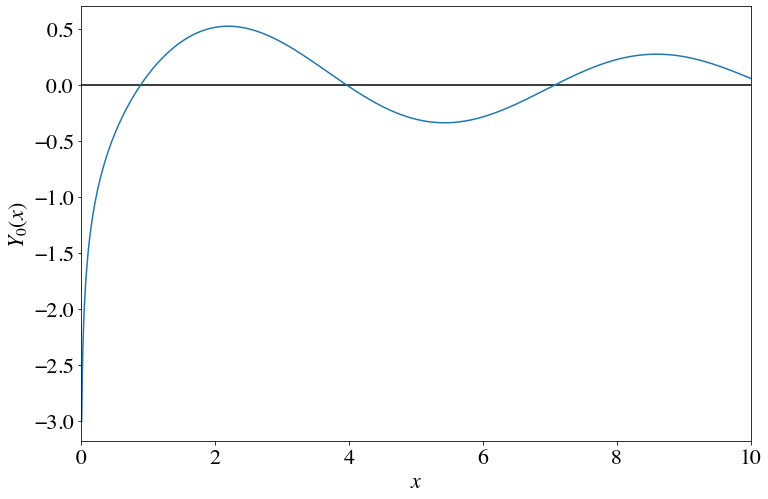

In [3]:
from scipy.special import yn  # Bessel fn of second kind
    
def f(x):
    return yn(0, x)

x = np.linspace(0, 10, 1000)
plt.plot(x, f(x))
plt.hlines(0, 0, 10)
plt.axis(xmin=0, xmax=10)
plt.xlabel('$x$');
plt.ylabel('$Y_0(x)$');

In [4]:
# Find value of third root
r, info, flag, mesg = optimize.fsolve(f, 7, full_output=True)
print(mesg)
r

The solution converged.


array([7.08605106])

In [5]:
# Integral to third root
integrate.quad(f, 0, r)

(-0.294889399752376, 8.266598516826207e-10)

In [6]:
# check using scipy.special functions
from scipy.special import yn_zeros, itj0y0
print('Third root is', yn_zeros(0, 3)[-1])
print('Integral to third root is', itj0y0(r)[1][0])

Third root is 7.086051060301773
Integral to third root is -0.2948893997523783


### Exercises 3, 4 and 5

In [7]:
# create 100 samples from a Normal distribution
# with mean 5 and standard deviation 1
np.random.seed(54321)
n = 100
m = 5
s = 1
d = stats.norm.rvs(m, s, size=n)

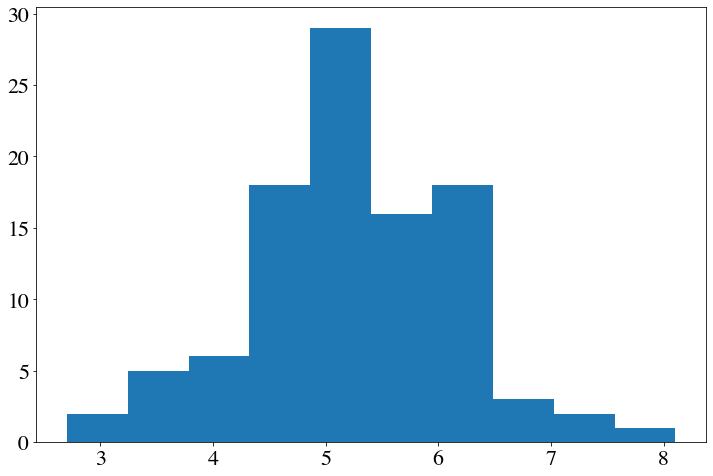

In [8]:
# histogram the data - this can be done with numpy,
# or simultaneously with plotting with pyplot
#hx, hy = numpy.histogram(d, bins=10)
hy, hx, p = plt.hist(d, bins=10, histtype='stepfilled')

In [9]:
# get the width of the bins and hence normalisation
w = hx[1]-hx[0]
a = n*w
# get the centres of the bins
hxc = 0.5*(hx[:-1] + hx[1:])

In [10]:
# returns the value of a Gaussian with specified amplitude,
# mean and sigma, evaluated at x (just for convenience)
def g(p, a, x):
    m, s = p
    return a * stats.norm.pdf(x, m, s)

In [11]:
# returns chisq of specified Gaussian for data (x, y)
def f(p, a, x, y):
    return ((y - g(p, a, x))**2).sum()

In [12]:
# find parameter set which minimises chisq
results = optimize.minimize(f, (1, 1), args=(a, hxc, hy))
results

      fun: nan
 hess_inv: array([[ 0.48124335, -1.11939839],
       [-1.11939839,  2.62493041]])
      jac: array([nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 484
      nit: 4
     njev: 121
   status: 2
  success: False
        x: array([ 3653.36691193, -8597.93735592])

In [13]:
# Specify parameter bounds
results = optimize.minimize(f, (3, 3), args=(a, hxc, hy), bounds=((None, None), (1e-6, None)))
results

      fun: 101.20417934635326
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.84217094e-06, -4.26325641e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 81
      nit: 15
   status: 0
  success: True
        x: array([5.26031668, 0.8557135 ])

In [14]:
# get fit parameters
r1 = results.x

In [15]:
# use MLE method provided in stats (actually understands that this is samples from a distribution)
r2 = stats.norm.fit(d)

true function:  mean = 5.000, sigma = 1.000
optimize.fmin:  mean = 5.260, sigma = 0.856
stats.norm.fit: mean = 5.223, sigma = 0.939


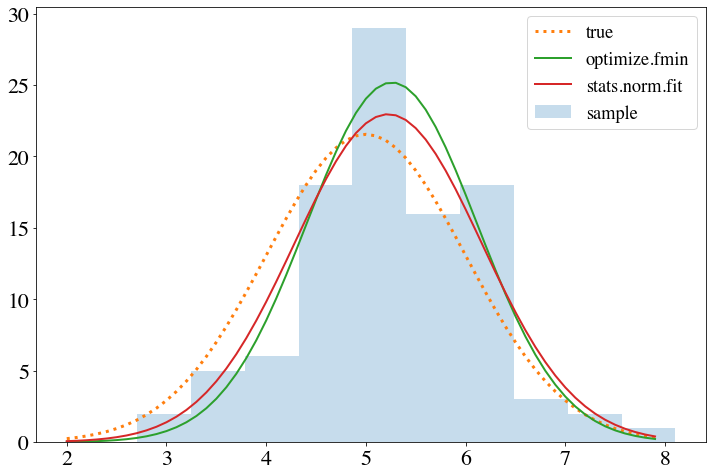

In [16]:
# plot true function and fit results over histogram
x = np.arange(m-3*s, m+3*s, s/10.0)
plt.hist(d, bins=hx, histtype='stepfilled', linestyle=None,
         alpha=0.25, label='sample')
plt.plot(x, g((m, s), a, x), ':', label='true', lw=3)
plt.plot(x, g(r1, a, x), label='optimize.fmin', lw=2)
plt.plot(x, g(r2, a, x), label='stats.norm.fit', lw=2)
plt.legend(prop={'size':'small'})

# neatly print results to screen
print('true function:  mean = {:5.3f}, sigma = {:5.3f}'.format(m, s))
print('optimize.fmin:  mean = {:5.3f}, sigma = {:5.3f}'.format(*r1))
print('stats.norm.fit: mean = {:5.3f}, sigma = {:5.3f}'.format(*r2))

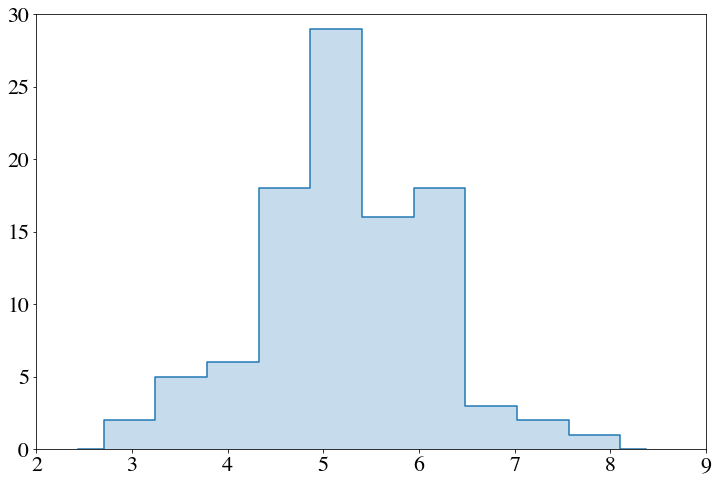

In [17]:
# Additional note:
# trick for drawing a binned function without original sample
# add zero bins at each end of distribution
hhxc = np.concatenate(([hxc[0]-w], hxc, [hxc[-1]+w]))
hhy = np.concatenate(([0], hy, [0]))
plt.plot(hhxc, hhy, drawstyle='steps-mid', label='sample')
plt.fill_between(hhxc, 0, hhy, step='mid', alpha=0.25)
_ = plt.axis(xmin=2, xmax=9, ymin=0, ymax=30)